In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import os
import PIL
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
os.getcwd()

'C:\\Users\\VuralBayrakli\\Transfer_Learning_Siniflandirma'

In [3]:
ust_dizin = os.path.dirname(os.getcwd())

In [4]:
ust_dizin

'C:\\Users\\VuralBayrakli'

In [2]:
data = tf.keras.utils.image_dataset_from_directory("TRAIN", image_size=(224,224), label_mode="binary")

Found 383 files belonging to 2 classes.


In [3]:
data = data.map(lambda x, y: (x/255, y))

In [4]:
num_classes = 2
train_size = int(len(data) * 0.80)
test_size = int(len(data) * 0.20)
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [5]:
a, b = next(iter(train))

In [6]:
b

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [20]:
train_verileri = []
train_etiketleri = []
test_verileri = []
test_etiketleri = []

for veri, etiket in train:
    for img, label in zip(veri, etiket):
        train_verileri.append(img.numpy())
        train_etiketleri.append(label.numpy())

for veri, etiket in test:
    for img, label in zip(veri, etiket):
        test_verileri.append(img.numpy())
        test_etiketleri.append(label.numpy())

In [28]:
train_verileri = np.array(train_verileri)
train_etiketleri = np.array(train_etiketleri)
test_verileri = np.array(test_verileri)
test_etiketleri = np.array(test_etiketleri)

train_etiketleri = tf.cast(train_etiketleri, dtype=tf.uint8)
test_etiketleri = tf.cast(test_etiketleri, dtype=tf.uint8)

num_classes = 2 
train_etiketleri_kategorik = tf.keras.utils.to_categorical(train_etiketleri, num_classes=num_classes)
test_etiketleri_kategorik = tf.keras.utils.to_categorical(test_etiketleri, num_classes=num_classes)


train_veri_kumesi = tf.data.Dataset.from_tensor_slices((train_verileri, train_etiketleri_kategorik))
test_veri_kumesi = tf.data.Dataset.from_tensor_slices((test_verileri, test_etiketleri_kategorik))


batch_size = 32 
train_veri_kumesi = train_veri_kumesi.shuffle(len(train_verileri)).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_veri_kumesi = test_veri_kumesi.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [38]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224,3), trainable=False)

In [55]:
number_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(number_of_classes, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_4 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 3,571,778
Trainable params: 1,313,794
Non-trainable params: 2,257,984
_________________________________________________________________


In [56]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["acc"]
    
)

model.fit(train_veri_kumesi, epochs=5)

Epoch 1/5
9/9 [==============================] - 8s 681ms/step - loss: 0.9257 - acc: 0.7292
Epoch 2/5
9/9 [==============================] - 7s 733ms/step - loss: 0.0469 - acc: 0.9826
Epoch 3/5
9/9 [==============================] - 7s 745ms/step - loss: 0.0156 - acc: 0.9965
Epoch 4/5
9/9 [==============================] - 8s 902ms/step - loss: 0.0021 - acc: 1.0000
Epoch 5/5
9/9 [==============================] - 8s 848ms/step - loss: 0.0018 - acc: 1.0000


In [57]:
model.evaluate(test_veri_kumesi)

2/2 [==============================] - 2s 786ms/step - loss: 0.0015 - acc: 1.0000


[0.001514211529865861, 1.0]

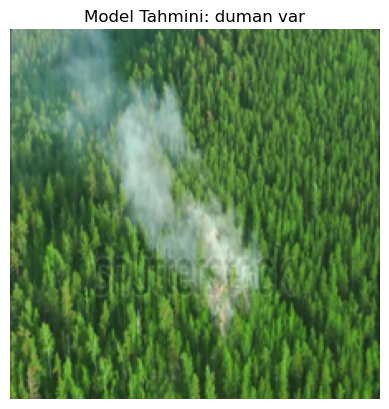

In [66]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
image = Image.open("test_exmp/frame_vid6_240.jpg").resize((224,224))

image = np.array(image)/255

logit = model(np.expand_dims(image, axis=0))

plt.imshow(image)
if np.argmax(logit) == 0:
    plt.title(f"Model Tahmini: duman var")
    plt.axis('off')
    plt.show()

else:

    plt.title(f"Model Tahmini: duman yok")
    plt.axis('off')
    plt.show()

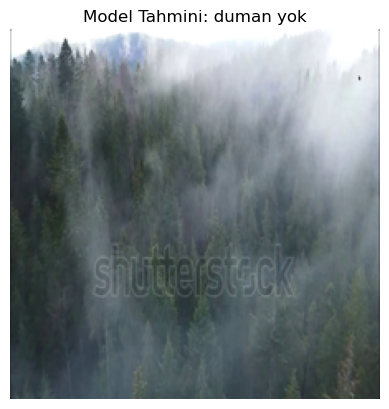

In [65]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
image = Image.open("test_exmp/frame_vid7_360.jpg").resize((224,224))

image = np.array(image)/255

logit = model(np.expand_dims(image, axis=0))

plt.imshow(image)
if np.argmax(logit) == 0:
    plt.title(f"Model Tahmini: duman var")
    plt.axis('off')
    plt.show()

else:

    plt.title(f"Model Tahmini: duman yok")
    plt.axis('off')
    plt.show()